# Analysis of GRB 080916C with GBM

In [1]:
import warnings
warnings.simplefilter("ignore")
from threeML import *
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

17:18:53 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=514867;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=526766;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=160798;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=251934;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

17:18:54 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=788921;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=827870;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

17:18:54 INFO      Starting 3ML!                                                                     ]8;id=722768;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=657213;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=742759;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=68306;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=233378;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=203351;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=307365;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=151793;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=125183;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=913176;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=896413;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=827594;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=69328;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=747880;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=734990;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=579701;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=210680;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=807287;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

17:18:55 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=282082;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=302347;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=469960;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=263615;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=106025;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=53625;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

### Examining the GBM Catalog and getting some info

In [2]:
gbm_catalog = FermiGBMBurstCatalog()

17:19:00 INFO      The cache for fermigbrst does not yet exist. We will try to    ]8;id=725375;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/io/get_heasarc_table_as_pandas.py\get_heasarc_table_as_pandas.py]8;;\:]8;id=747026;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/io/get_heasarc_table_as_pandas.py#64\64]8;;\
                  build it                                                                                         
                                                                                                                   

         INFO      Building cache for fermigbrst                                 ]8;id=867752;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/io/get_heasarc_table_as_pandas.py\get_heasarc_table_as_pandas.py]8;;\:]8;id=309681;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/io/get_heasarc_table_as_pandas.py#112\112]8;;\

In [3]:
source_name = "GRB080916009"

In [4]:
gbm_catalog.query_sources(source_name)

<Table length=1>
    name        ra     dec    trigger_time   t90  
   object    float64 float64    float64    float64
------------ ------- ------- ------------- -------
GRB080916009 119.800 -56.600 54725.0088613  62.977

In [5]:
grb_info = gbm_catalog.get_detector_information()[source_name]
grb_info

{'source': {'fluence': '1.280000-64.257000', 'peak': '2.048000-3.072000'},
 'background': {'pre': '-40.100000--6.250000',
  'post': '105.210000-146.350000',
  'full': '-40.100000--6.250000,105.210000-146.350000'},
 'trigger': 'bn080916009',
 'detectors': array(['n3', 'n4', 'b0'], dtype='<U2'),
 'best fit model': {'fluence': 'sbpl', 'peak': 'comp'},
 'ra': 119.8,
 'dec': -56.6}

In [6]:
ra = grb_info["ra"]
dec = grb_info["dec"]
trigger_name = grb_info["trigger"]
gbm_detectors = grb_info["detectors"]
source_interval = grb_info["source"]["fluence"]
background_interval = grb_info["background"]["full"]
best_fit_model = grb_info["best fit model"]["fluence"]

### Downloading the data

In [7]:
dload = download_GBM_trigger_data(trigger_name, detectors=gbm_detectors)

## Time Integrated Analysis

### Fitting the background and setting up the plugins with TimeSeriesBuilder

In [8]:
fluence_plugins = []
time_series = {}
for det in gbm_detectors:
    
    # Use CSPEC data to fit the background using the background selections. 
    # We use CSPEC because it has a longer duration for fitting the background.
    
    ts_cspec = TimeSeriesBuilder.from_gbm_cspec_or_ctime(
        det, cspec_or_ctime_file=dload[det]["cspec"], rsp_file=dload[det]["rsp"]
    )

    ts_cspec.set_background_interval(*background_interval.split(","))
    # The background is saved to an HDF5 file that stores the polynomial coefficients and selections
    ts_cspec.save_background(f"{det}_bkg.h5", overwrite=True)

    # We use TTE data for the actual spectral analysis
    ts_tte = TimeSeriesBuilder.from_gbm_tte(
        det,
        tte_file=dload[det]["tte"],
        rsp_file=dload[det]["rsp"],
        restore_background=f"{det}_bkg.h5",
    )

    time_series[det] = ts_tte

    # The source selection from the catalog is set
    ts_tte.set_active_time_interval(source_interval)

    # The plugin for the time integrated analysis is created for each detector
    fluence_plugin = ts_tte.to_spectrumlike()

    # Standard GBM channel selections for spectral analysis
    if det.startswith("b"):
        fluence_plugin.set_active_measurements("250-30000")

    else:
        fluence_plugin.set_active_measurements("9-900")

    fluence_plugin.rebin_on_background(1.0)

    fluence_plugins.append(fluence_plugin)

17:20:29 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=698735;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=763431;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=31012;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=130499;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=771755;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=927119;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

Loading PHAII Spectra:   0%|                                                    | 0/1859 [00:00<?, ?it/s]

17:20:30 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=190553;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=382313;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=733586;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=939643;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=15874;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=418193;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=597199;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=131824;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=273514;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=251577;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=243688;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=552571;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=560579;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=867289;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=769214;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=130458;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=573400;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=761261;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=664190;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=806614;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

Finding best polynomial Order:   0%|                                               | 0/4 [00:00<?, ?it/s]

17:20:32 INFO      Auto-determined polynomial order: 0                                ]8;id=962131;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=913938;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_03 background:   0%|                                             | 0/128 [00:00<?, ?it/s]

17:20:39 INFO      None 0-order polynomial fit with the mle method                               ]8;id=604709;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=23232;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n3_bkg.h5                                         ]8;id=924376;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=794013;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n3_bkg.h5                                         ]8;id=563396;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=538816;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file /shared/grb/glg_tte_n3_bn080916009_v01.fit.gz contains duplicate     ]8;id=9880;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=569755;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#43\43]8;;\
                  time tags and is thus invalid. Contact the FSSC                                                  

         WARNING   The TTE file %s was not sorted in time but contains no duplicate events. We will  ]8;id=796867;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=664029;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#54\54]8;;\
                  sort the times, but use caution with this file. Contact the FSSC.                                

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=25755;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=320331;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=391116;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=323399;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=845651;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=930430;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=294523;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=895991;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=798050;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=871944;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=749680;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=154009;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=963095;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=499714;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=230678;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=518300;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=670912;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=834342;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=225181;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=928247;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         INFO      Successfully restored fit from n3_bkg.h5                              ]8;id=435754;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=775222;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=550846;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=806442;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         INFO      Interval set to 1.28-64.257 for n3                                    ]8;id=240451;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=404637;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=244663;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=482303;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=395230;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=180304;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=931874;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=749132;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-124                                    ]8;id=618624;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=771882;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

17:20:42 INFO      Now using 120 bins                                                          ]8;id=968801;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=356241;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=411040;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=778371;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=964724;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=407835;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=664338;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=282433;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

Loading PHAII Spectra:   0%|                                                    | 0/1859 [00:00<?, ?it/s]

17:20:43 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=559394;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=960188;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=875129;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=202717;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=494133;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=682524;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=112802;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=706091;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=26182;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=759540;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=468615;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=130260;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=398418;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=978208;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=529502;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=420159;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=926498;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=425215;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=367482;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=430944;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

Finding best polynomial Order:   0%|                                               | 0/4 [00:00<?, ?it/s]

17:20:44 INFO      Auto-determined polynomial order: 1                                ]8;id=973587;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=841774;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_04 background:   0%|                                             | 0/128 [00:00<?, ?it/s]

17:20:51 INFO      None 1-order polynomial fit with the mle method                               ]8;id=559701;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=177150;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n4_bkg.h5                                         ]8;id=597519;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=945279;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n4_bkg.h5                                         ]8;id=937253;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=552982;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file %s was not sorted in time but contains no duplicate events. We will  ]8;id=154004;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=829984;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#54\54]8;;\
                  sort the times, but use caution with this file. Contact the FSSC.                                

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=477275;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=29256;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=928297;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=461365;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=334093;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=634143;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=200954;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=745353;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=242145;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=648860;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=472390;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=282502;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=445970;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=298343;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=464582;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=609819;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=217870;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=445280;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=159148;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=780061;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         INFO      Successfully restored fit from n4_bkg.h5                              ]8;id=609557;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=133480;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=410238;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=1742;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         INFO      Interval set to 1.28-64.257 for n4                                    ]8;id=263922;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=484380;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=76665;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=272945;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=131248;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=202558;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=500236;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=896737;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 5-123                                    ]8;id=233504;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=540167;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=937193;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=331531;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=452710;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=638825;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=59421;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=89604;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

Loading PHAII Spectra:   0%|                                                    | 0/1859 [00:00<?, ?it/s]

17:20:52 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=432529;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=715534;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=90855;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=490215;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=818551;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=33231;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=106506;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=841361;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=597560;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=927887;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=360173;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=503585;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

Finding best polynomial Order:   0%|                                               | 0/4 [00:00<?, ?it/s]

         INFO      Auto-determined polynomial order: 1                                ]8;id=776846;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=751894;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_BGO_00 background:   0%|                                             | 0/128 [00:00<?, ?it/s]

17:21:00 INFO      None 1-order polynomial fit with the mle method                               ]8;id=105362;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=527158;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to b0_bkg.h5                                         ]8;id=512873;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=943273;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to b0_bkg.h5                                         ]8;id=422638;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=959280;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file /shared/grb/glg_tte_b0_bn080916009_v01.fit.gz contains duplicate     ]8;id=28780;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=156578;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#43\43]8;;\
                  time tags and is thus invalid. Contact the FSSC                                                  

         WARNING   The TTE file %s was not sorted in time but contains no duplicate events. We will  ]8;id=574398;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=830940;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#54\54]8;;\
                  sort the times, but use caution with this file. Contact the FSSC.                                

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=942006;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=425202;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=15417;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=655554;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=272321;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=764866;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=367671;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=439678;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=414648;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=635463;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX'                                                                                

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=513371;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=400149;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         INFO      Successfully restored fit from b0_bkg.h5                              ]8;id=439638;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=910778;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Interval set to 1.28-64.257 for b0                                    ]8;id=726536;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=828906;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=128402;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=304703;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=566200;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=687898;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=922269;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=955670;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 250-30000 translates to channels 1-119                                ]8;id=179541;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=194880;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=200555;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=22347;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

### Viewing the lightcurves

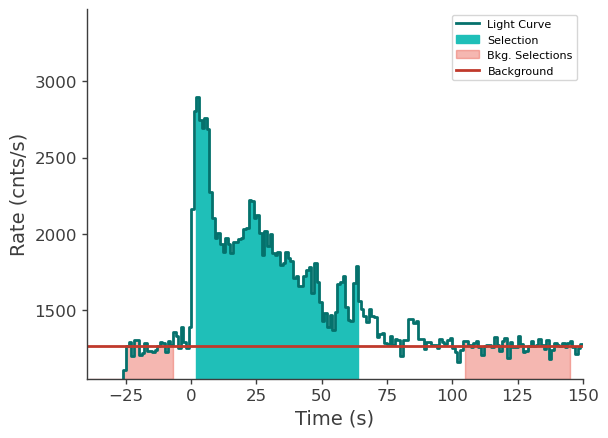

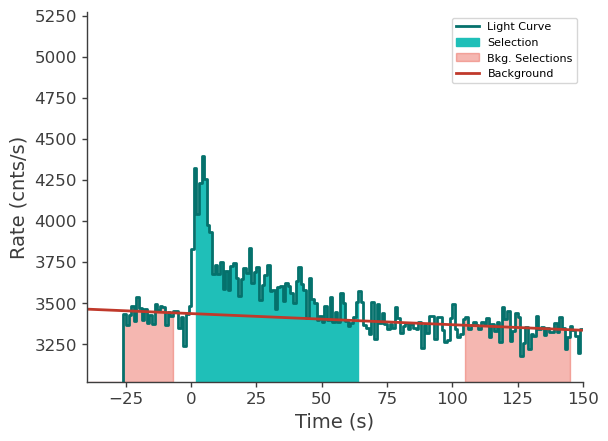

In [9]:
time_series['n3'].view_lightcurve(-40, 150);
time_series['b0'].view_lightcurve(-40, 150);

### Getting the best fit model from the catalog

In [10]:
model_catalog = gbm_catalog.get_model(best_fit_model, "fluence")["GRB080916009"]
model_catalog.display()

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (5):
--------------------

                                value min_value max_value            unit
GRB080916009...K             0.012255       0.0      None  keV-1 s-1 cm-2
GRB080916009...alpha        -1.130424      -1.5       2.0                
GRB080916009...break_energy  309.2031      10.0      None             keV
GRB080916009...break_scale        0.3       0.0      10.0                
GRB080916009...beta         -2.096931      -5.0      -1.6                

Fixed parameters (3):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

### Creating a new model with priors

In [11]:
sbpl = SmoothlyBrokenPowerLaw()
sbpl.alpha.prior = Truncated_gaussian(lower_bound = -1.5, upper_bound = 1, mu=-1, sigma=0.5)
sbpl.beta.prior = Truncated_gaussian(lower_bound = -5, upper_bound = -1.6, mu=-2.25, sigma=0.5)
sbpl.break_energy.prior = Log_normal(mu=2, sigma=1)
sbpl.break_energy.bounds = (None, None)
sbpl.break_scale.prior = Log_uniform_prior(lower_bound=1e-4, upper_bound=10)
sbpl.K.prior = Log_uniform_prior(lower_bound=1e-3, upper_bound=1e1)
source = PointSource(source_name, ra, dec, spectral_shape=sbpl)
model = Model(source)

17:21:01 WARNING   We have set the min_value of SmoothlyBrokenPowerLaw.break_energy to 1e-99       ]8;id=431544;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=687165;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\
                  because there was a postive transform                                                            

         WARNING   We have set the min_value of SmoothlyBrokenPowerLaw.break_energy to 1e-99       ]8;id=558651;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=703796;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\
                  because there was a postive transform                                                            

### Running the Bayesian analysis

In [17]:
bayes = BayesianAnalysis(model, DataList(*fluence_plugins))
bayes.set_sampler("emcee", share_spectrum=True)
bayes.sampler.setup(n_iterations=500, burn_in=10)
bayes.sample()

17:26:38 WARNING   External parameter cons_n3 already exist in the model. Overwriting it...            ]8;id=39870;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/model.py\model.py]8;;\:]8;id=182099;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/model.py#622\622]8;;\

         WARNING   External parameter cons_n4 already exist in the model. Overwriting it...            ]8;id=925028;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/model.py\model.py]8;;\:]8;id=175848;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/model.py#622\622]8;;\

         WARNING   External parameter cons_b0 already exist in the model. Overwriting it...            ]8;id=341702;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/model.py\model.py]8;;\:]8;id=494937;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/model.py#622\622]8;;\

17:26:38 INFO      sampler set to emcee                                                    ]8;id=38574;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=483651;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

17:26:54 INFO      Mean acceptance fraction: 0.5915                                            ]8;id=798259;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=466921;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py#157\157]8;;\

17:26:56 INFO      fit restored to maximum of posterior                                         ]8;id=100086;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=325766;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=531084;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=669591;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
GRB080916009...K             (1.464 -0.019 +0.014) x 10^-2  1 / (keV s cm2)
GRB080916009...alpha                  -1.029 -0.022 +0.018                 
GRB080916009...break_energy       (3.05 -0.29 +0.5) x 10^2              keV
GRB080916009...beta                      -2.30 -0.15 +0.08

Values of -log(posterior) at the minimum:

-log(posterior)
n3        -1029.394681
n4        -1022.766630
b0        -1056.881088
total     -3109.042399

Values of statistical measures:

statistical measures
AIC            6226.198113
BIC            6241.606930
DIC            6188.023878
PDIC              3.895550

### Plotting the corner plot

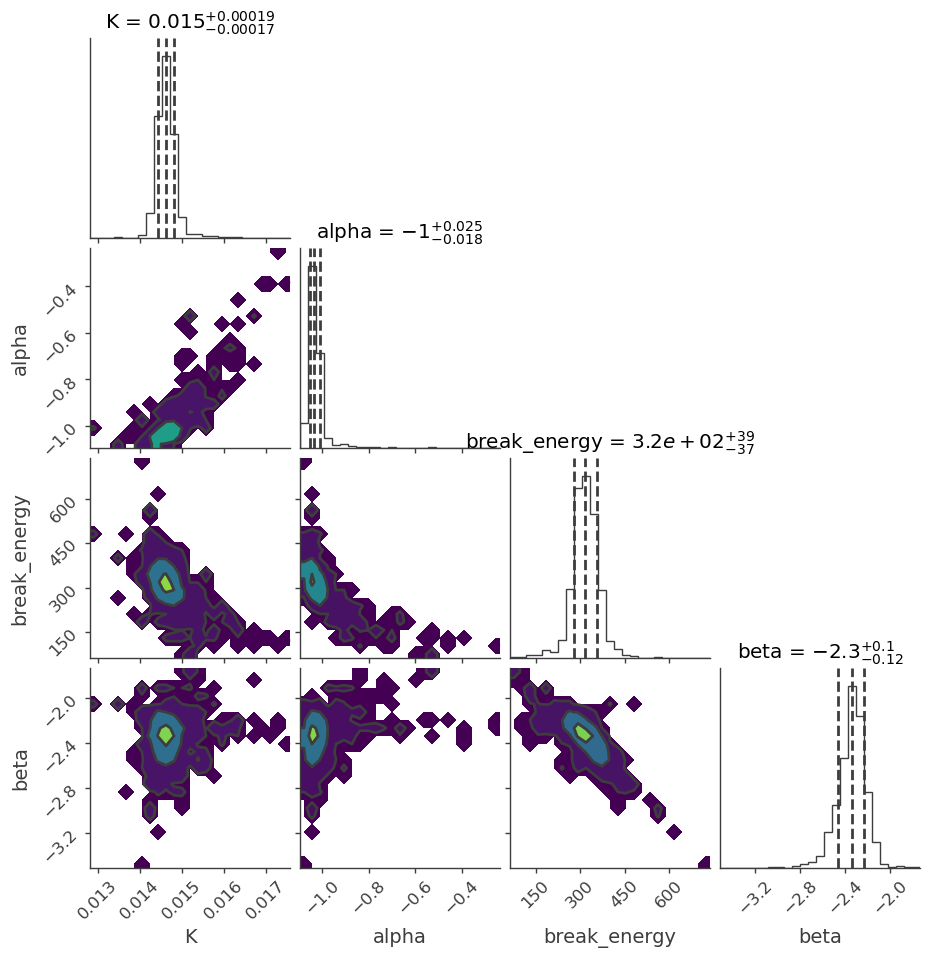

In [15]:
bayes.results.corner_plot();

### Plotting the best fit model with counts and residuals

17:30:00 INFO      fit restored to median of posterior                                          ]8;id=49205;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=952154;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#164\164]8;;\

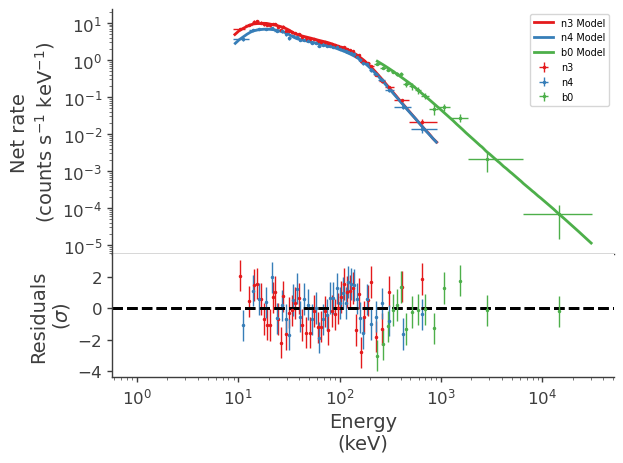

In [19]:
bayes.restore_median_fit()
fig = display_spectrum_model_counts(bayes, min_rate=10)

### Plotting the time-integrated spectrum

processing Bayesian analyses:   0%|                                                | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                                                        | 0/100 [00:00<?, ?it/s]

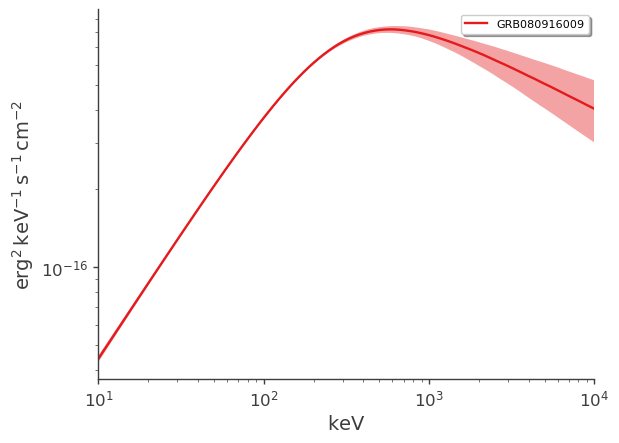

In [20]:
fig = plot_spectra(bayes.results, ene_min=10, ene_max=1e4, flux_unit="erg2/(cm2 s keV)", energy_unit="keV")

### Calculating the total flux

In [21]:
flux = bayes.results.get_flux(ene_min=10 * u.keV, ene_max=1 * u.MeV, flux_unit="erg/cm2/s")
flux

processing Bayesian analyses:   0%|                                                | 0/1 [00:00<?, ?it/s]

flux  \
GRB080916009: total  1.210157758738201e-06 erg / (s cm2)   

                                                low bound  \
GRB080916009: total  1.1930802320134485e-06 erg / (s cm2)   

                                                 hi bound  
GRB080916009: total  1.2280157094594832e-06 erg / (s cm2)

# Time Resolved Analysis

### Creating temporal binning using the Bayesian Block algorithm

In [22]:
n3 = time_series["n3"]

In [23]:
n3.create_time_bins(0, 60, method="bayesblocks", use_background=True, p0=0.01)

17:32:50 INFO      Created 10 bins via bayesblocks                                       ]8;id=257348;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=222704;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

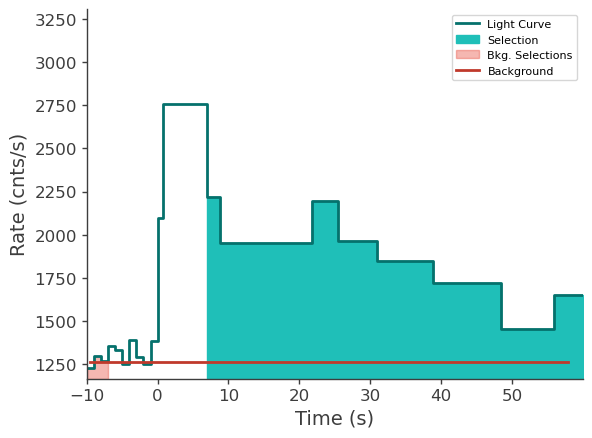

In [24]:
n3.view_lightcurve(use_binner=True);

### Creating the new plugins with the chosen binning

In [25]:
time_resolved_plugins = {}

for k, v in time_series.items():
    v.read_bins(n3)
    time_resolved_plugins[k] = v.to_spectrumlike(from_bins=True)

17:33:27 INFO      Created 10 bins via custom                                            ]8;id=396044;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=691077;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

Creating plugins:   0%|                                                           | 0/10 [00:00<?, ?it/s]

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=839986;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=733596;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.267000198364258)                                                                              

         INFO      Interval set to 1.28-64.257 for n3                                    ]8;id=681230;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=877970;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Created 10 bins via custom                                            ]8;id=515195;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=702538;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

Creating plugins:   0%|                                                           | 0/10 [00:00<?, ?it/s]

17:33:28 WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=465337;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=179285;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.369999885559082)                                                                              

         INFO      Interval set to 1.28-64.257 for n4                                    ]8;id=293406;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=312919;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Created 10 bins via custom                                            ]8;id=235418;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=201154;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

Creating plugins:   0%|                                                           | 0/10 [00:00<?, ?it/s]

         INFO      Interval set to 1.28-64.257 for b0                                    ]8;id=180961;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=401390;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

### Setting up the model

In [26]:
band = Band()
band.alpha.prior = Truncated_gaussian(lower_bound=-1.5, upper_bound=1, mu=-1, sigma=0.5)
band.beta.prior = Truncated_gaussian(lower_bound=-5, upper_bound=-1.6, mu=-2, sigma=0.5)
band.xp.prior = Log_normal(mu=2, sigma=1)
band.xp.bounds = (None, None)
band.K.prior = Log_uniform_prior(lower_bound=1e-10, upper_bound=1e3)
source = PointSource(source_name, ra, dec, spectral_shape=band)
band_model = Model(source)

17:33:36 WARNING   We have set the min_value of Band.xp to 1e-99 because there was a postive       ]8;id=827628;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=947795;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\
                  transform                                                                                        

         WARNING   We have set the min_value of Band.xp to 1e-99 because there was a postive       ]8;id=682160;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=733582;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\
                  transform                                                                                        

### Performing a MLE analysis for each time interval

In [27]:
analysis = []
for interval in range(4):
    # clone the model above so that we have a separate model for each fit

    this_model = clone_model(band_model)

    # for each detector set up the plugin for this time interval

    this_data_list = []
    for k, v in time_resolved_plugins.items():
        pi = v[interval]

        if k.startswith("b"):
            pi.set_active_measurements("250-30000")
        else:
            pi.set_active_measurements("9-900")

        pi.rebin_on_background(1.0)

        this_data_list.append(pi)

    # create a data list

    dlist = DataList(*this_data_list)

    # set up the JointLikelihood object and perform the fit

    jl = JointLikelihood(this_model, dlist)
    jl.fit()

    # at this stage we coudl also save the analysis result to disk but we will simply hold onto them in memory

    analysis.append(jl)

17:33:46 INFO      Range 9-900 translates to channels 5-124                                    ]8;id=973410;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=570339;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=632710;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=460021;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      Range 9-900 translates to channels 5-123                                    ]8;id=353689;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=971837;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=239178;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=994586;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      Range 250-30000 translates to channels 1-119                                ]8;id=674587;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=126187;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 107 bins                                                          ]8;id=644550;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=575181;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=704204;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=686025;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

         WARNING   13.08 percent of samples have been thrown away because they failed the  ]8;id=963402;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=731223;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/analysis_results.py#1740\1740]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

Best fit values:

result  \
parameter                                                        
GRB080916009.spectrum.main.Band.K      (3.0 -0.6 +0.7) x 10^-2   
GRB080916009.spectrum.main.Band.alpha   (-6.6 +/- 1.7) x 10^-1   
GRB080916009.spectrum.main.Band.xp      (4.0 -1.2 +1.7) x 10^2   
GRB080916009.spectrum.main.Band.beta              -2.3 +/- 0.6   

                                                  unit  
parameter                                               
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

Correlation matrix:

1.00  0.93 -0.97  0.64
 0.93  1.00 -0.90  0.57
-0.97 -0.90  1.00 -0.72
 0.64  0.57 -0.72  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
n3_interval0        239.667696
n4_interval0        256.981355
b0_interval0        274.416838
total               771.065890

Values of statistical measures:

statistical measures
AIC           1550.245094
BIC           1565.653911

         INFO      Range 9-900 translates to channels 5-124                                    ]8;id=775637;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=660181;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=421254;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=346942;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      Range 9-900 translates to channels 5-123                                    ]8;id=215116;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=101655;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=623245;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=239295;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      Range 250-30000 translates to channels 1-119                                ]8;id=608931;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=405300;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=885544;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=460378;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=684877;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=828656;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

Best fit values:

result  \
parameter                                                           
GRB080916009.spectrum.main.Band.K      (4.06 -0.13 +0.14) x 10^-2   
GRB080916009.spectrum.main.Band.alpha    (-8.69 +/- 0.28) x 10^-1   
GRB080916009.spectrum.main.Band.xp           (6.5 +/- 0.6) x 10^2   
GRB080916009.spectrum.main.Band.beta               -2.16 +/- 0.09   

                                                  unit  
parameter                                               
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

Correlation matrix:

1.00  0.87 -0.95  0.45
 0.87  1.00 -0.86  0.37
-0.95 -0.86  1.00 -0.56
 0.45  0.37 -0.56  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
n3_interval1        627.754110
n4_interval1        631.646007
b0_interval1        659.317034
total              1918.717150

Values of statistical measures:

statistical measures
AIC           3845.547614
BIC           3860.956432

17:33:47 INFO      Range 9-900 translates to channels 5-124                                    ]8;id=461422;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=698306;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=733544;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=626611;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      Range 9-900 translates to channels 5-123                                    ]8;id=239920;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=109228;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=790785;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=691771;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      Range 250-30000 translates to channels 1-119                                ]8;id=630747;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=467807;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=794389;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=215306;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=70068;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=374388;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

         WARNING   2.92 percent of samples have been thrown away because they failed the   ]8;id=439654;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=297990;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/analysis_results.py#1740\1740]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

Best fit values:

result  \
parameter                                                           
GRB080916009.spectrum.main.Band.K      (2.31 -0.18 +0.19) x 10^-2   
GRB080916009.spectrum.main.Band.alpha              -1.09 +/- 0.06   
GRB080916009.spectrum.main.Band.xp         (7.0 -1.8 +2.4) x 10^2   
GRB080916009.spectrum.main.Band.beta               -2.16 +/- 0.30   

                                                  unit  
parameter                                               
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

Correlation matrix:

1.00  0.87 -0.93  0.32
 0.87  1.00 -0.84  0.26
-0.93 -0.84  1.00 -0.45
 0.32  0.26 -0.45  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
n3_interval2        374.443681
n4_interval2        409.034117
b0_interval2        418.558153
total              1202.035951

Values of statistical measures:

statistical measures
AIC           2412.185217
BIC           2427.594034

         INFO      Range 9-900 translates to channels 5-124                                    ]8;id=776438;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=960174;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=653657;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=897301;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      Range 9-900 translates to channels 5-123                                    ]8;id=477001;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=965238;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=443991;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=260785;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      Range 250-30000 translates to channels 1-119                                ]8;id=275828;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=937017;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 119 bins                                                          ]8;id=601055;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=991204;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=835231;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=961143;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

Best fit values:

result  \
parameter                                                        
GRB080916009.spectrum.main.Band.K      (1.98 +/- 0.11) x 10^-2   
GRB080916009.spectrum.main.Band.alpha  (-10.0 +/- 0.4) x 10^-1   
GRB080916009.spectrum.main.Band.xp      (4.3 -0.5 +0.6) x 10^2   
GRB080916009.spectrum.main.Band.beta            -1.99 +/- 0.10   

                                                  unit  
parameter                                               
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

Correlation matrix:

1.00  0.92 -0.95  0.35
 0.92  1.00 -0.86  0.28
-0.95 -0.86  1.00 -0.49
 0.35  0.28 -0.49  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
n3_interval3        743.060667
n4_interval3        731.336237
b0_interval3        764.841403
total              2239.238307

Values of statistical measures:

statistical measures
AIC           4486.589929
BIC           4501.998746

### Displaying the results and saving them to disk

result  \
parameter                                                         
GRB080916009.spectrum.main.Band.K       (3.0 -0.5 +0.8) x 10^-2   
GRB080916009.spectrum.main.Band.alpha  (-6.6 -1.4 +1.8) x 10^-1   
GRB080916009.spectrum.main.Band.xp       (4.0 -1.1 +1.4) x 10^2   
GRB080916009.spectrum.main.Band.beta           -2.29 -1.5 +0.35   

                                                  unit  
parameter                                               
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

result  \
parameter                                                            
GRB080916009.spectrum.main.Band.K       (4.06 -0.13 +0.14) x 10^-2   
GRB080916009.spectrum.main.Band.alpha  (-8.69 -0.27 +0.28) x 10^-1   
GRB080916009.spectrum.main.Band.xp            (6.5 +/- 0.6) x 10^2   
GRB080916009.spectrum.main.Band.beta             -2.16 -0.11 +0.09   

                                                  unit  
parameter                                               
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

result  \
parameter                                                           
GRB080916009.spectrum.main.Band.K      (2.31 -0.18 +0.19) x 10^-2   
GRB080916009.spectrum.main.Band.alpha              -1.09 +/- 0.06   
GRB080916009.spectrum.main.Band.xp         (7.0 -1.6 +2.9) x 10^2   
GRB080916009.spectrum.main.Band.beta             -2.16 -0.6 +0.21   

                                                  unit  
parameter                                               
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

result  \
parameter                                                           
GRB080916009.spectrum.main.Band.K      (1.98 -0.10 +0.12) x 10^-2   
GRB080916009.spectrum.main.Band.alpha     (-10.0 +/- 0.4) x 10^-1   
GRB080916009.spectrum.main.Band.xp         (4.3 -0.5 +0.6) x 10^2   
GRB080916009.spectrum.main.Band.beta            -1.99 -0.12 +0.09   

                                                  unit  
parameter                                               
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

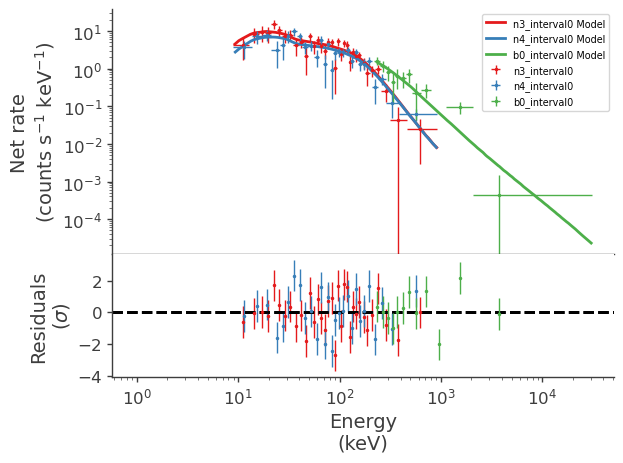

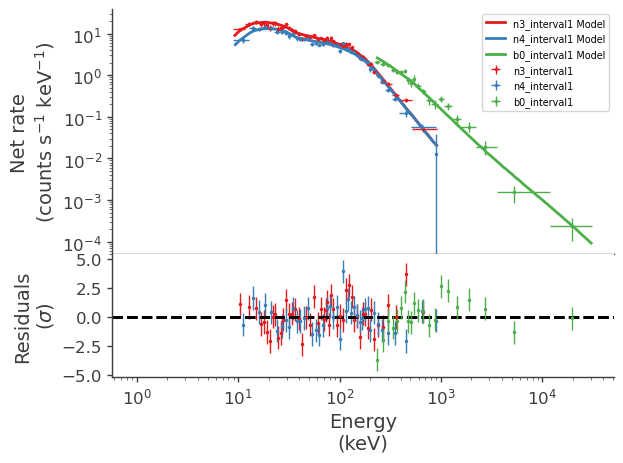

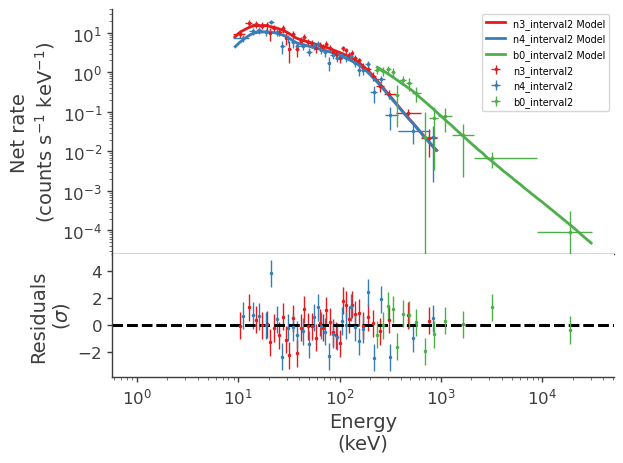

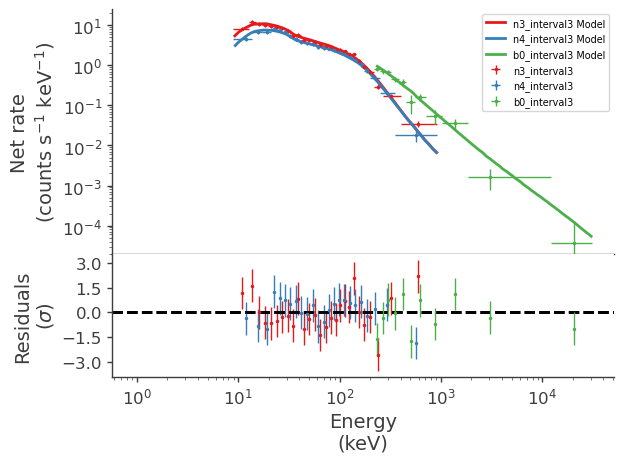

In [28]:
for i, a in enumerate(analysis):
    a.get_errors()
    a.results.write_to("results_%s_%d.fits" % (source_name, i), overwrite=True)
    display_spectrum_model_counts(a, min_rate=[20, 20, 20]);

### Plotting the best fit spectrum for each time interval

processing MLE analyses:   0%|                                                     | 0/4 [00:00<?, ?it/s]

Propagating errors:   0%|                                                        | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|                                                        | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|                                                        | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|                                                        | 0/100 [00:00<?, ?it/s]

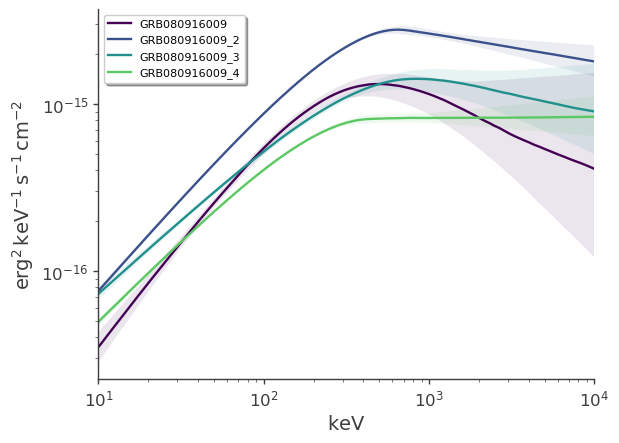

In [29]:
fig = plot_spectra(
    *[a.results for a in analysis],
    flux_unit="erg2/(cm2 s keV)",
    fit_cmap="viridis",
    contour_cmap="viridis",
    contour_style_kwargs=dict(alpha=0.1),
)

### Reloading the results from disk

In [30]:
results_reloaded = load_analysis_results("results_%s_1.fits" % source_name)
results_reloaded.get_data_frame()

value  negative_error  \
GRB080916009.spectrum.main.Band.K        0.040608       -0.001332   
GRB080916009.spectrum.main.Band.alpha   -0.869457       -0.027112   
GRB080916009.spectrum.main.Band.xp     648.249831      -55.361217   
GRB080916009.spectrum.main.Band.beta    -2.164458       -0.094461   

                                       positive_error      error  \
GRB080916009.spectrum.main.Band.K            0.001355   0.001344   
GRB080916009.spectrum.main.Band.alpha        0.027496   0.027304   
GRB080916009.spectrum.main.Band.xp          59.194487  57.277852   
GRB080916009.spectrum.main.Band.beta         0.093324   0.093893   

                                                  unit  
GRB080916009.spectrum.main.Band.K      1 / (keV s cm2)  
GRB080916009.spectrum.main.Band.alpha                   
GRB080916009.spectrum.main.Band.xp                 keV  
GRB080916009.spectrum.main.Band.beta

### Propagating the errors (if needed)

In [31]:
alpha = results_reloaded.get_variates("GRB080916009.spectrum.main.Band.alpha")
beta = results_reloaded.get_variates("GRB080916009.spectrum.main.Band.beta")

print("Propagating a+b, with a and b respectively:")
print(alpha)
print(beta)

print("\nThis is the result (with errors):")
res = alpha + beta
print(res)

Propagating a+b, with a and b respectively:
equal-tail: (-8.69 +/- 0.27) x 10^-1, hpd: (-8.69 -0.25 +0.29) x 10^-1
equal-tail: -2.17 +/- 0.09, hpd: -2.17 -0.10 +0.09

This is the result (with errors):
equal-tail: -3.03 +/- 0.11, hpd: -3.03 +/- 0.11
